In [1]:
# Parameters
MSA_MARKET = "Austin"
BRAND_MSA = "Austin, TX"


In [2]:
import pandas as pd
import datetime as dt
import numpy as np
from snowflake.connector.pandas_tools import write_pandas
import snowflake.connector
import os



In [3]:
# Import the function from your external script
from IOS_query import run_snowflake_query

# Run the query and get the results as a DataFrame
ios_df = run_snowflake_query()

# Display the DataFrame
ios_df.head()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNfb5swFMW%2FCvKewYYQaKwkVZo0G1rboSat1LwZ26RewGa2Kck%2B%2FUz%2BSJ2mVtobupzr37n32OPrfV15b1wboeQEhAECHpdUMSG3E%2FC0XvpXwDOWSEYqJfkEHLgB19OxIXXV4FlrX%2BUj%2F9VyYz13kDS4%2FzEBrZZYESMMlqTmBluKV7P7OxwFCBNjuLYOB84tzAjHerW2wRB2XRd0g0DpLYwQQhCNoFP1ki%2FgHaL5nNFoZRVV1aVl72b6ABFCFPcIp3CE%2FNx4I%2BRpBZ9RipPI4G%2Frde7nP1Zr4M0u082VNG3N9YrrN0H50%2BPdyYBxDn62xnZK74xfEyEDI1VXVmTHqaqb1rojA%2FcFS85gpbbCLSpbTECzE%2ByJZOuX2Wb4e%2FMSRnsZtulA57XNM7qsZwX7%2FnzzkBzU19t8fkuB93yJNepjzYxpeSb7MK0roSj2w9CPojVCOE5wnAYovNoAb%2BHCFJLYY%2Bc%2FjgNaqZY5t5oTSrkxR6uUSZ9uBTyVoDEK9ilBlsYFRUlByZAUZZIkaUrChIQhT6LBkKeoRISmwxLxOIkoZZyM0mJY0GJISTE

/Users/lmola/Documents/Luis_Projects/OOH/prod/testing/IOS_query.py:185: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(io_query, conn)


,IOS,ACCOUNT_ID,ID_FRM_ACCTS,BILLINGCITY,BILLINGSTATE,BILLINGCOUNTRY,BILLINGZIP,IO_YYYYQQ,IO_WEEK_OF_QTR,IO_QUARTER,...,INBOUND_EXCLUSION_FLAG,OWNER,OPPORTUNITY_ID,QL_REFERRER_NAME,QL_REFERRER_ROLE,QL_SOURCED_BY_NAME,QL_SOURCED_BY_ROLE,OPPORTUNITY_SOURCED_BY_NAME,OPPORTUNITY_SOURCED_BY_ROLE,DEMAND_CHANNEL
0,0066S00000zLgI2QAK,0016S000030r6NFQAY,0016S000030r6NFQAY,Dover,DE,Canada,19901,20223,2022-02-21,3,...,Include,Self Service,None,None,None,None,None,None,None,None
1,006PJ0000086jacYAA,001PJ000008J43LYAS,001PJ000008J43LYAS,None,NC,US,27409,20244,2024-03-18,4,...,Include,MRA,None,None,None,None,None,None,None,None
2,0066S000012cDzIQAU,0016S000038078WQAQ,0016S000038078WQAQ,St. Louis,MO,None,63112,20231,2022-06-13,1,...,Include,MRA,None,None,None,None,None,None,None,None
3,0066S00000zIvpMQAS,0016S000030oBqaQAE,0016S000030oBqaQAE,New York,New York,United States,10001,20222,2021-11-22,2,...,Include,Self Service,None,None,None,None,None,None,None,None
4,006PJ000004SKeZYAW,001PJ000004X7iJYAS,001PJ000004X7iJYAS,Palm Desert,CA,None,92260,20243,2023-12-04,3,...,Include,Self Service,None,None,None,None,None,None,None,None


In [4]:
# Import the function from your external script
from district_map_query import map_query

# Run the query and get the results as a DataFrame
map_df = map_query()
map_df = map_df[['ZIP_CODE__C', 'STATE__C', 'STATE_ABBREVIATION__C', 'MSA_MARKET_PRIMARY__C', 'MSA_NUMBER__C', 'MARKETING_DISTRICT__C']]

# Display the DataFram

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNfb9owFMW%2FSuQ9J3YCJGABFZRVQ2s7VGil7c1xHPBw7ODrENpPP%2FNP6jS10t6im3P9O%2Fcee3hzqFSwFxak0SMURwQFQnNTSL0eoefVXdhHATimC6aMFiP0KgDdjIfAKlXTSeM2%2BknsGgEu8AdpoMcfI9RYTQ0DCVSzSgB1nC4nD%2Fc0iQhlAMI6j0OXlgKkZ22cqynGbdtGbScydo0TQggmA%2BxVR8kX9A5Rf86orXGGG3VtOfiZPkDEmHSPCK%2FwhMWlcSr1eQWfUfKzCOi31WoRLn4sVyiYXKe7NRqaStilsHvJxfPT%2FdkAeAe%2FG3CtsVsIKyZ1BNq0pWJbwU1VN84fGfkvXIoCK7OWflHz2QjVW1noDX847F4elZrG7ZvbZ7O63f%2Fs59n3bY915gPYlcv%2BtGkN%2B8pR8HKNNTnGOgdoxFwfw3S%2BRJJuGMdhkqwIod2MJv2IdLq%2FUDDzYUrN3KnzH8cRV6YpvFsrGOcC4GSVFzrka4nPJQxg8DElXGTdnJM056zH8jJN0yxjccriWKRJpycyUhLGs15JRDdNOC8EG2R5L%2Bd5j7N8MOig802jJ%2B9

/Users/lmola/Documents/Luis_Projects/OOH/prod/testing/district_map_query.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
 map_df.head()

,ZIP_CODE__C,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,MSA_NUMBER__C,MARKETING_DISTRICT__C
0,97003,Oregon,OR,"Salem, OR MSA",41420.0,sanitized_f667cee84b45028f5db8f1939e1c06b90c06...
1,21866,Maryland,MD,"Salisbury, MD MSA",41540.0,DC Metro
2,90189,California,CA,"Los Angeles-Long Beach-Santa Ana, CA MSA",31100.0,Los Angeles
3,48557,Michigan,MI,"Flint, MI MSA",22420.0,Rest of Country
4,82931,Wyoming,WY,WY NONMETROPOLITAN AREA,99048.0,Rest of Country


In [6]:
missing_geo_map = map_df.isna().mean() * 100

print("Columns in IOs_filtered with missing values:")
print(missing_geo_map)

Columns in IOs_filtered with missing values:
ZIP_CODE__C              0.0
STATE__C                 0.0
STATE_ABBREVIATION__C    0.0
MSA_MARKET_PRIMARY__C    0.0
MSA_NUMBER__C            0.0
MARKETING_DISTRICT__C    0.0
dtype: float64


In [7]:
print(len(ios_df))
print(len(map_df))

merged_df = pd.merge(ios_df, map_df, left_on='BILLINGZIP', right_on = 'ZIP_CODE__C', how='inner')



print(len(merged_df))

print(f'loss is {1-len(merged_df)/len(ios_df)}')

# Convert the column to date format with specified format
merged_df['IO_DATE'] = pd.to_datetime(merged_df['IO_DATE'], format='%Y-%m-%d')

merged_df.head()

26818
42491
25757
loss is 0.03956298008800063


,IOS,ACCOUNT_ID,ID_FRM_ACCTS,BILLINGCITY,BILLINGSTATE,BILLINGCOUNTRY,BILLINGZIP,IO_YYYYQQ,IO_WEEK_OF_QTR,IO_QUARTER,...,QL_SOURCED_BY_ROLE,OPPORTUNITY_SOURCED_BY_NAME,OPPORTUNITY_SOURCED_BY_ROLE,DEMAND_CHANNEL,ZIP_CODE__C,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,MSA_NUMBER__C,MARKETING_DISTRICT__C
0,0066S00000zLgI2QAK,0016S000030r6NFQAY,0016S000030r6NFQAY,Dover,DE,Canada,19901,20223,2022-02-21,3,...,None,None,None,None,19901,Delaware,DE,"Dover, DE MSA",20100.0,Philly Metro
1,006PJ0000086jacYAA,001PJ000008J43LYAS,001PJ000008J43LYAS,None,NC,US,27409,20244,2024-03-18,4,...,None,None,None,None,27409,North Carolina,NC,"Greensboro-High Point, NC MSA",24660.0,Rest of Country
2,0066S000012cDzIQAU,0016S000038078WQAQ,0016S000038078WQAQ,St. Louis,MO,None,63112,20231,2022-06-13,1,...,None,None,None,None,63112,Missouri,MO,"St. Louis, MO-IL MSA",41180.0,Rest of Country
3,0066S00000zIvpMQAS,0016S000030oBqaQAE,0016S000030oBqaQAE,New York,New York,United States,10001,20222,2021-11-22,2,...,None,None,None,None,10001,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",35620.0,New York Metro
4,006PJ000004SKeZYAW,001PJ000004X7iJYAS,001PJ000004X7iJYAS,Palm Desert,CA,None,92260,20243,2023-12-04,3,...,None,None,None,None,92260,California,CA,"Riverside-San Bernardino-Ontario, CA MSA",40140.0,Rest of South California


In [8]:
#from datetime import date

# today = date.today()

# # Convert to datetime and round to the start of the month
# today_month_start = pd.to_datetime(today).to_period('M').to_timestamp()

# # Convert back to string in yyyy-mm-dd format
# end_date = today_month_start.strftime('%Y-%m-%d')

# print(end_date)

In [9]:
merged_df['IO_DATE']

0       2022-02-24
1       2024-03-21
2       2022-06-15
3       2021-11-24
4       2023-12-06
           ...    
25752   2023-07-06
25753   2023-07-07
25754   2022-07-22
25755   2024-06-17
25756   2023-09-05
Name: IO_DATE, Length: 25757, dtype: datetime64[ns]

In [10]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [11]:
#import datetime
#merged_df["IO_DATE"] = pd.to_datetime(merged_df["IO_DATE"], errors="coerce")
# Add a 'year_month' column to group by month
merged_df["year_month"] = merged_df["IO_DATE"].dt.to_period('M')
# Convert to datetime and round to the start of the month
#merged_df['check'] = merged_df["year_month"].to_period('M').to_timestamp()

# Convert back to string in yyyy-mm-dd format
#end_date = today_month_start.strftime('%Y-%m-%d')

#merged_df["year_month"] = merged_df["IO_DATE"].dt.to_period("M").to_timestamp()
print(merged_df["IO_DATE"])

# Aggregate by month, with multiple aggregations
monthly_aggregated = (
    merged_df.groupby(
        ["year_month", "STATE__C", "STATE_ABBREVIATION__C", "MSA_MARKET_PRIMARY__C"]
    )
    .agg(
        io_count=("IOS", "nunique"),  # Count rows per month
    )
    .reset_index()
)

0       2022-02-24
1       2024-03-21
2       2022-06-15
3       2021-11-24
4       2023-12-06
           ...    
25752   2023-07-06
25753   2023-07-07
25754   2022-07-22
25755   2024-06-17
25756   2023-09-05
Name: IO_DATE, Length: 25757, dtype: datetime64[ns]


In [12]:
monthly_aggregated.head()

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
0,2021-06,Alabama,AL,AL NONMETROPOLITAN AREA,1
1,2021-06,Alabama,AL,"Huntsville, AL MSA",2
2,2021-06,Alabama,AL,"Montgomery, AL MSA",1
3,2021-06,Alaska,AK,"Anchorage, AK MSA",2
4,2021-06,Arizona,AZ,"Phoenix-Mesa-Scottsdale, AZ MSA",8


In [13]:
#Define Parameters


# MSA_MARKET = "New York"
# #STATE = "New York"
# BRAND_MSA = "New York, NY"

# BRAND_MSA_list = ["Austin, TX", "Denver, CO", "Los Angeles, CA", "Miami-Ft. Lauderdale, FL", 
#                   "New York, NY", "San Francisco-Oakland-San Jose, CA"]

# # Used as contains filter 
# MSA_MARKET_list = ["Austin", "Denver", "Los Angeles", "Miami", "New York", "San Francisco"]

# Used as equals filter
city_to_state = {
    "Austin": "Texas",
    "Denver": "Colorado",
    "Los Angeles": "California",
    "Miami": "Florida",
    "New York": "New York",
    "San Francisco": "California"
    
}

STATE = city_to_state[MSA_MARKET]

print('the state is ' + STATE)

#intervention_date = '2024-08-01'

campaign_start_dict = {'Austin, TX': '2024-09-09', 'Denver, CO': '2024-08-19', \
    'Los Angeles, CA': '2024-09-02', 'Miami-Ft. Lauderdale, FL': '2024-08-26',\
    'New York, NY': '2024-08-26', 'San Francisco-Oakland-San Jose, CA': '2024-09-02',\
    'Queens_New York': '2024-08-26', 'Brooklyn_New York': '2024-08-26',\
    'The Bronx_New York': '2024-08-26', 'Jersey City_New Jersey': '2024-08-26',\
    'Newark_New Jersey': '2024-08-26', 'San Jose_California': '2024-09-02'
    }


# Convert to datetime and round to the start of the month
month_start = pd.to_datetime(campaign_start_dict[BRAND_MSA]).to_period('M').to_timestamp()

# Convert back to string in yyyy-mm-dd format
intervention_date = month_start.strftime('%Y-%m-%d')

print(intervention_date)
#date_start = campaign_start_dict[treatment_city_region]


the state is Texas
2024-09-01


In [14]:
city_monthly_data = monthly_aggregated[
    monthly_aggregated["MSA_MARKET_PRIMARY__C"].str.contains(MSA_MARKET, case=False)
    & (monthly_aggregated["STATE__C"] == STATE)
    #& (monthly_aggregated["year_month"] >= '2022')
].sort_values(by="year_month", ascending=True)

city_monthly_data.head(5)

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
103,2021-06,Texas,TX,"Austin-Round Rock, TX MSA",11
245,2021-07,Texas,TX,"Austin-Round Rock, TX MSA",14
358,2021-08,Texas,TX,"Austin-Round Rock, TX MSA",6
478,2021-09,Texas,TX,"Austin-Round Rock, TX MSA",12
608,2021-10,Texas,TX,"Austin-Round Rock, TX MSA",15


In [15]:
city_monthly_data["year_month"] = city_monthly_data["year_month"].dt.to_timestamp()
city_monthly_data.head()

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
103,2021-06-01,Texas,TX,"Austin-Round Rock, TX MSA",11
245,2021-07-01,Texas,TX,"Austin-Round Rock, TX MSA",14
358,2021-08-01,Texas,TX,"Austin-Round Rock, TX MSA",6
478,2021-09-01,Texas,TX,"Austin-Round Rock, TX MSA",12
608,2021-10-01,Texas,TX,"Austin-Round Rock, TX MSA",15


In [16]:

#from datetime import date



print(intervention_date)

marketing_pre_period = city_monthly_data[
    city_monthly_data["year_month"] < intervention_date
][["year_month", "io_count"]]

today = dt.date.today()

# # Convert to datetime and round to the start of the month
today_month_start = pd.to_datetime(today).to_period('M').to_timestamp()

# # Convert back to string in yyyy-mm-dd format
treatment_end_date = today_month_start.strftime('%Y-%m-%d')

print(treatment_end_date)


marketing_post_period = city_monthly_data[
    (city_monthly_data["year_month"]
    >= intervention_date) & (city_monthly_data["year_month"]
    < treatment_end_date)
][["year_month", "io_count"]]

marketing_pre_period.head()

# ['2010-02-05','2012-06-29']


# marketing_post_period.head()

2024-09-01
2024-11-01


,year_month,io_count
103,2021-06-01,11
245,2021-07-01,14
358,2021-08-01,6
478,2021-09-01,12
608,2021-10-01,15


In [17]:
df_final = city_monthly_data[['year_month', 'io_count']]
# Convert the date column to datetime (if it's not already)
df_final['year_month'] = pd.to_datetime(df_final['year_month'])  # Adjust column name if necessary

# Set the date column as the index
df_final.set_index('year_month', inplace=True)
df_final.head()

/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_4874/330667666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['year_month'] = pd.to_datetime(df_final['year_month'])  # Adjust column name if necessary


,io_count
year_month,
2021-06-01,11
2021-07-01,14
2021-08-01,6
2021-09-01,12
2021-10-01,15


In [18]:
type(marketing_post_period)

pandas.core.frame.DataFrame

In [19]:
# Combine data
#intervention_date = '2024-08-01'
data = pd.concat([marketing_pre_period, marketing_post_period])
data["intervention"] = data["year_month"] >= pd.to_datetime(intervention_date)
data["t"]=range(len(data))
data['month'] = data['year_month'].dt.month

data_final = data.set_index('year_month')


In [20]:
data.head()

,year_month,io_count,intervention,t,month
103,2021-06-01,11,False,0,6
245,2021-07-01,14,False,1,7
358,2021-08-01,6,False,2,8
478,2021-09-01,12,False,3,9
608,2021-10-01,15,False,4,10


In [21]:
data_final.head()

,io_count,intervention,t,month
year_month,,,,
2021-06-01,11,False,0,6
2021-07-01,14,False,1,7
2021-08-01,6,False,2,8
2021-09-01,12,False,3,9
2021-10-01,15,False,4,10


In [22]:
data_final.tail()

,io_count,intervention,t,month
year_month,,,,
2024-06-01,11,False,36,6
2024-07-01,18,False,37,7
2024-08-01,20,False,38,8
2024-09-01,21,True,39,9
2024-10-01,13,True,40,10


In [23]:
data_final.isna().sum()

io_count        0
intervention    0
t               0
month           0
dtype: int64

In [24]:
data_final.head()


,io_count,intervention,t,month
year_month,,,,
2021-06-01,11,False,0,6
2021-07-01,14,False,1,7
2021-08-01,6,False,2,8
2021-09-01,12,False,3,9
2021-10-01,15,False,4,10


In [25]:
data_final.tail()

,io_count,intervention,t,month
year_month,,,,
2024-06-01,11,False,36,6
2024-07-01,18,False,37,7
2024-08-01,20,False,38,8
2024-09-01,21,True,39,9
2024-10-01,13,True,40,10


In [26]:
# Import the function from your external script
from direct_search_query import run_direct_search_query

# Run the query and get the results as a DataFrame
#direct_search_df = run_direct_search_query('New York', 'New York')
direct_search_df = run_direct_search_query(MSA_MARKET, STATE)

# Display the DataFrame
direct_search_df.head()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNRb9owFIX%2FSuQ9J3ZCSBoLqCisGxp0qISt25vjOOCS2KntkPLv5xCQOk2ttLfo5lx%2F595jj25fq9I5MqW5FGPgewg4TFCZc7Ebg216794ARxsiclJKwcbgxDS4nYw0qcoaTxuzF4%2FspWHaOPYgoXH3YwwaJbAkmmssSMU0NhRvpqslDjyEidZMGYsDl5Zcc8vaG1NjCNu29dqBJ9UOBgghiBJoVZ3kE3iDqD9m1EoaSWV5bXm1M72D8CEKO4RVWML60njHRb%2BCjyhZL9L4a5qu3fX3TQqc6XW6mRS6qZjaMHXklG0fl70BbR08N9q0Uh20WxEuPC1kW5TkwKis6sbYIz37BQuWw1LuuF3UYj4G9YHnX262y0P2NFvtSDtLn%2FbZ8yr6yX7tNy%2BbMlHZ6fP%2B2939IhsExy0Fzo9rrEEX60Lrhi1EF6axJRSEru%2B7QZAihMMYDyIvDJPfwJnbMLkg5tz5j2OPlrLJrVvFCKVM67NVmguX7jjsS1BrCbuUYB6HGUVRRsmQZEUURXFM%2FIj4PouCwZDFqECExsMCsTAKKM0ZSeJsmNFsSEmWJAPQ3zR89q4m%2F7W%2FE

/Users/lmola/Documents/Luis_Projects/OOH/prod/testing/direct_search_query.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(direct_query, conn)


,CITY,REGION,COUNTRY,MARKETING_CHANNEL,MONTH_START,MONTHLY_SUM
1360,Austin,Texas,United States,Direct,2022-03-01,785
2939,Austin,Texas,United States,Direct,2022-04-01,212
6572,Austin,Texas,United States,Direct,2022-05-01,208
8230,Austin,Texas,United States,Direct,2022-06-01,275
14298,Austin,Texas,United States,Direct,2022-07-01,5187


In [27]:
# Import the function from your external script
from brand_search_query import run_brand_search_query

# Run the query and get the results as a DataFrame
print(MSA_MARKET)
print(STATE)
print(BRAND_MSA)

brand_search_df = run_brand_search_query()

brand_search_df = brand_search_df[(brand_search_df['METRO'] == BRAND_MSA) & (brand_search_df['REGION'] == STATE)]

# Display the DataFrame
brand_search_df.head()

Austin
Texas
Austin, TX


Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lVNdb9sgFP0rFnu2wY5jNyhJlTXKmqltsibdtL1hwCmNDR4X18m%2FH%2FmSOk2tNIkHdDmXc%2B45MLze1VXwKi0oo0cojggKpOZGKL0Zoaf1LLxCATimBauMliO0l4Cux0NgddXQSeue9aP83Upwgb9IAz0cjFBrNTUMFFDNagnUcbqa3N%2FRJCKUAUjrPB06twhQnuvZuYZi3HVd1PUiYzc4IYRgMsAedYB8Qm8omo85Gmuc4aa6tOz8TO9QxJikBwqP8AzLc%2BNnpU8WfMRSnEBAb9frZbhcrNYomFymuzEa2lralbSvisunx7uTAPAKXlpwnbFbCGumdATadGXFtpKbummdvzLyO1xKgSuzUd6o%2BXSEmq0SaTLtvrTN4sfXl4W3ZBlPs%2B5%2BM0t5ncyau93g5%2F726qHMBBTfOAq%2BX2JNDrHOAVo514cwnS%2BRJA3jOEySNSE0zf2Kspj8QsHUh6k0c8fOfxRHvDKt8GqtZJxLgKNULnTINwqfShjA4ENKWORpwUlWcNZnRZllWZ6zOGNxLLOk15c5KQnjeb8kMs0SzoVkg7zoF7zoc1YMBj10emn0qN2O%2F8u%2FI

/Users/lmola/Documents/Luis_Projects/OOH/prod/testing/brand_search_query.py:70: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(brand_query, conn)


,STATE,REGION,METRO,SPEND,IMPRESSIONS,CLICKS,MONTH_START
0,Texas,Texas,"Austin, TX",2863.060000,821,347,2024-09-01
164,Texas,Texas,"Austin, TX",2266.815911,589,216,2024-11-01
370,Texas,Texas,"Austin, TX",1610.100000,793,283,2023-06-01
496,Texas,Texas,"Austin, TX",1890.150000,826,288,2023-11-01
584,Texas,Texas,"Austin, TX",3058.370000,1033,399,2024-01-01


In [28]:
data_final.head()

,io_count,intervention,t,month
year_month,,,,
2021-06-01,11,False,0,6
2021-07-01,14,False,1,7
2021-08-01,6,False,2,8
2021-09-01,12,False,3,9
2021-10-01,15,False,4,10


In [29]:
data_reset = data_final.reset_index()
data_reset.head()

,year_month,io_count,intervention,t,month
0,2021-06-01,11,False,0,6
1,2021-07-01,14,False,1,7
2,2021-08-01,6,False,2,8
3,2021-09-01,12,False,3,9
4,2021-10-01,15,False,4,10


In [30]:
# Join DataFrames

# Convert column to datetime
data_reset['year_month'] = pd.to_datetime(data_reset['year_month'])
direct_search_df['MONTH_START'] = pd.to_datetime(direct_search_df['MONTH_START'])

df_merge_1 = pd.merge(data_reset, direct_search_df, left_on = 'year_month', \
    right_on = 'MONTH_START', \
    how = 'inner')

df_merge_1 = df_merge_1.rename(columns={'MONTH_START': 'direct_month_start', 'MONTHLY_SUM': 'direct_search_sum'})
df_merge_1 = df_merge_1.drop(columns = 'MARKETING_CHANNEL')

df_merge_1.head()

,year_month,io_count,intervention,t,month,CITY,REGION,COUNTRY,direct_month_start,direct_search_sum
0,2022-03-01,11,False,9,3,Austin,Texas,United States,2022-03-01,785
1,2022-04-01,14,False,10,4,Austin,Texas,United States,2022-04-01,212
2,2022-05-01,8,False,11,5,Austin,Texas,United States,2022-05-01,208
3,2022-06-01,11,False,12,6,Austin,Texas,United States,2022-06-01,275
4,2022-07-01,8,False,13,7,Austin,Texas,United States,2022-07-01,5187


In [31]:
brand_search_df['MONTH_START'] = pd.to_datetime(brand_search_df['MONTH_START'])

df_merge_2 = pd.merge(df_merge_1, brand_search_df, left_on = 'direct_month_start', \
    right_on = 'MONTH_START', \
    how = 'inner')

df_merge_2.head()



,year_month,io_count,intervention,t,month,CITY,REGION_x,COUNTRY,direct_month_start,direct_search_sum,STATE,REGION_y,METRO,SPEND,IMPRESSIONS,CLICKS,MONTH_START
0,2022-03-01,11,False,9,3,Austin,Texas,United States,2022-03-01,785,Texas,Texas,"Austin, TX",1136.67,1075,260,2022-03-01
1,2022-04-01,14,False,10,4,Austin,Texas,United States,2022-04-01,212,Texas,Texas,"Austin, TX",1042.38,973,243,2022-04-01
2,2022-05-01,8,False,11,5,Austin,Texas,United States,2022-05-01,208,Texas,Texas,"Austin, TX",789.10,975,228,2022-05-01
3,2022-06-01,11,False,12,6,Austin,Texas,United States,2022-06-01,275,Texas,Texas,"Austin, TX",927.65,1006,254,2022-06-01
4,2022-07-01,8,False,13,7,Austin,Texas,United States,2022-07-01,5187,Texas,Texas,"Austin, TX",1223.34,824,227,2022-07-01


In [32]:
columns_to_drop = ['CITY', 'REGION_x', 'COUNTRY', 'direct_month_start', 'STATE', 'REGION_y', 'METRO', 'MONTH_START']

df_final2 = df_merge_2.drop(columns = columns_to_drop)
df_final2 = df_final2.set_index('year_month')
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,11,False,9,3,785,1136.67,1075,260
2022-04-01,14,False,10,4,212,1042.38,973,243
2022-05-01,8,False,11,5,208,789.10,975,228
2022-06-01,11,False,12,6,275,927.65,1006,254
2022-07-01,8,False,13,7,5187,1223.34,824,227


In [33]:
df_final2['direct_search_sum'].describe()

count       32.000000
mean     10377.656250
std       4389.458058
min        208.000000
25%       9774.250000
50%      11438.500000
75%      12984.250000
max      16096.000000
Name: direct_search_sum, dtype: float64

In [34]:
df_final2 = df_final2[df_final2['direct_search_sum'] > 2]	

In [35]:
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,11,False,9,3,785,1136.67,1075,260
2022-04-01,14,False,10,4,212,1042.38,973,243
2022-05-01,8,False,11,5,208,789.10,975,228
2022-06-01,11,False,12,6,275,927.65,1006,254
2022-07-01,8,False,13,7,5187,1223.34,824,227


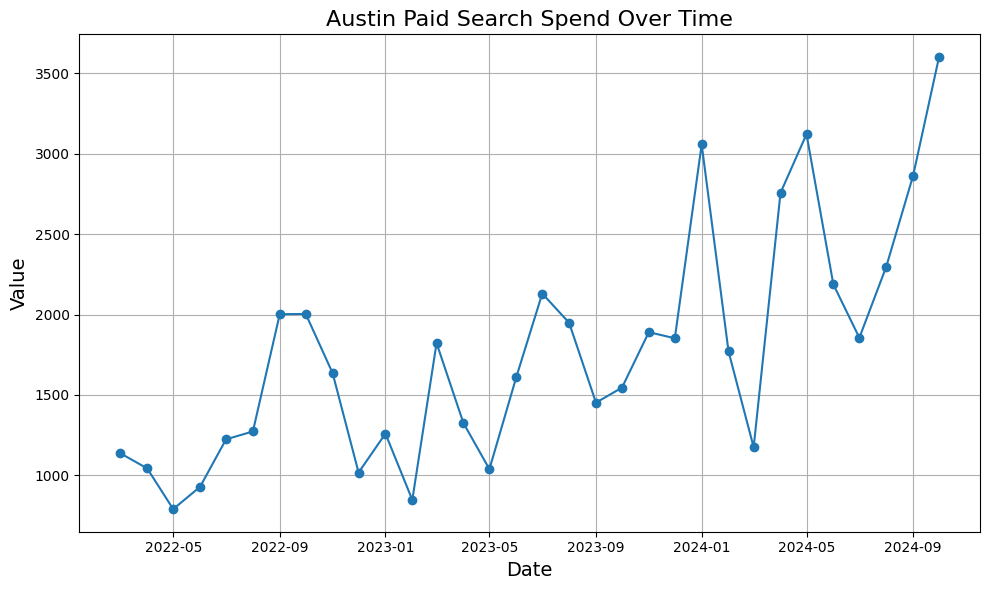

In [36]:

import matplotlib.pyplot as plt

df_series = df_final2.reset_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df_series['year_month'], df_series['SPEND'], marker='o')

# Customize the plot
plt.title(f'{MSA_MARKET} Paid Search Spend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig(fname = f'{MSA_MARKET} Paid Search Over Time')
# Show the plot
plt.show()

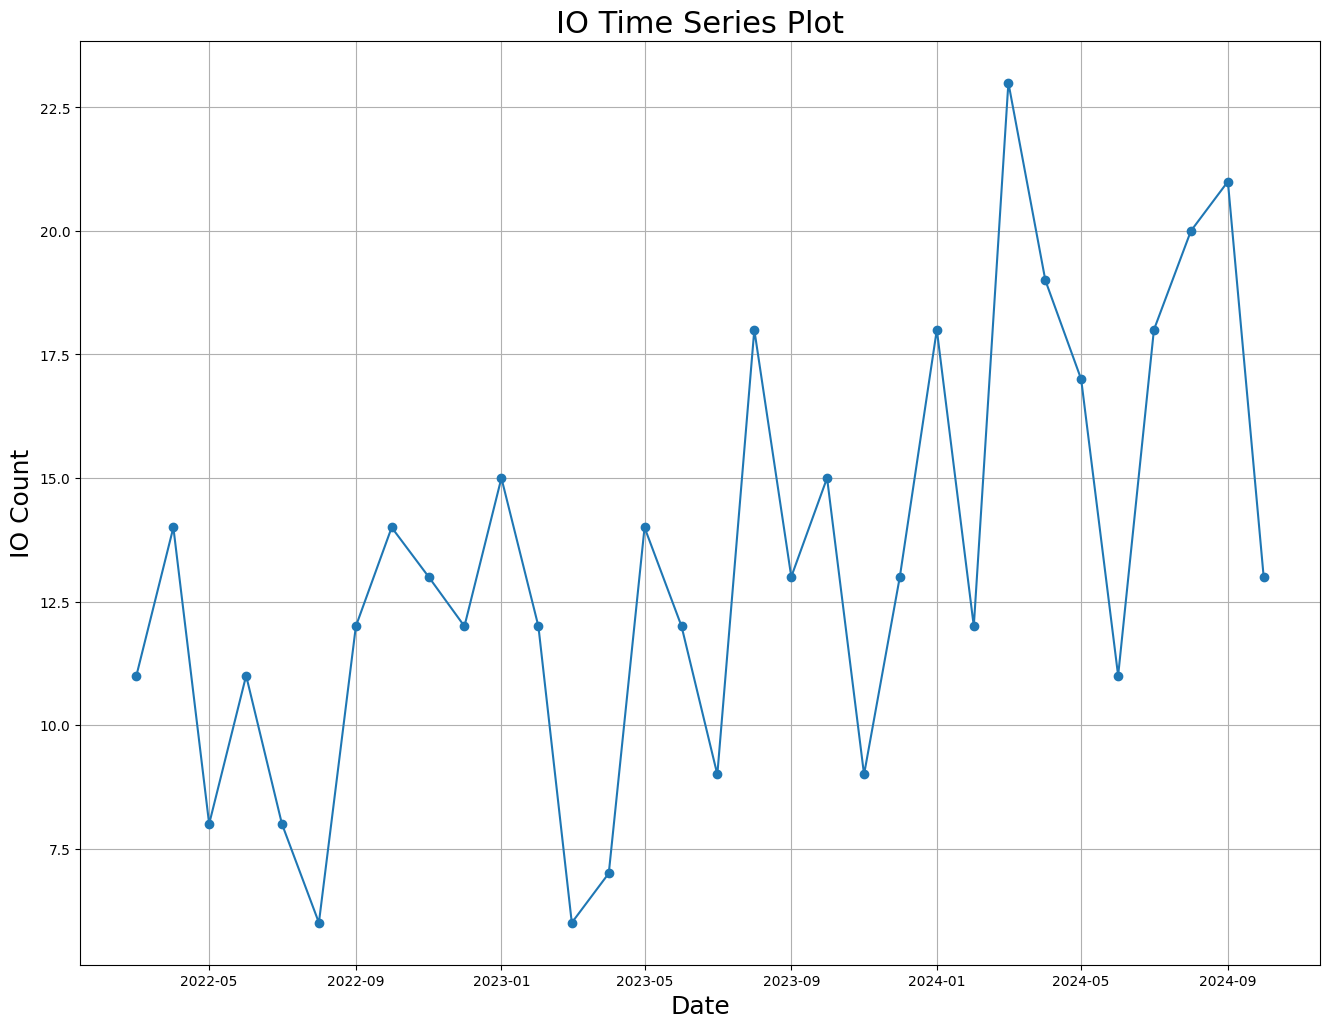

In [37]:
# Plot time series
#plt.plot(df_series['io_count'])


plt.figure(figsize=(16, 12))
plt.plot(df_series['year_month'], df_series['io_count'], marker='o')
plt.title('IO Time Series Plot', fontsize = 22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('IO Count', fontsize=18)
plt.grid(True)
plt.savefig(fname = f'{MSA_MARKET} IOs Over Time ')
plt.show()

In [38]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_series['io_count'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -3.7283408288910995
p-value: 0.003731721850266663


<Figure size 1000x600 with 0 Axes>

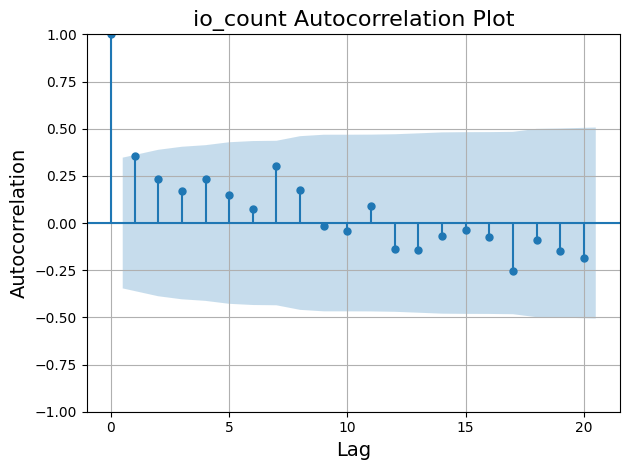

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot autocorrelation
plt.figure(figsize=(10, 6))
plot_acf(df_series['io_count'], lags=20)  # Specify number of lags
plt.title('io_count Autocorrelation Plot', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

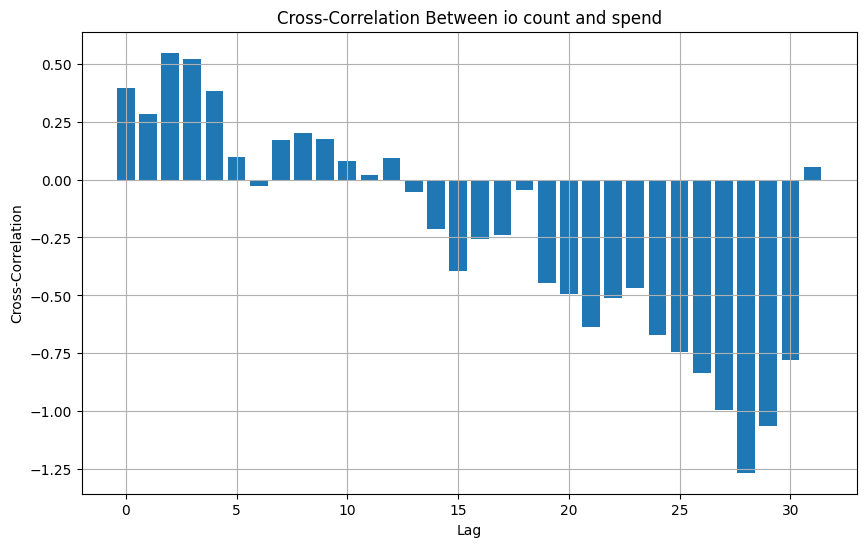

In [40]:
from statsmodels.tsa.stattools import ccf

# Compute cross-correlation between two features
cross_corr = ccf(df_series['io_count'], df_series['SPEND'])

# Plot the cross-correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(cross_corr)), cross_corr)
plt.title('Cross-Correlation Between io count and spend')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid()
plt.show()

In [41]:
#adding lags
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,11,False,9,3,785,1136.67,1075,260
2022-04-01,14,False,10,4,212,1042.38,973,243
2022-05-01,8,False,11,5,208,789.10,975,228
2022-06-01,11,False,12,6,275,927.65,1006,254
2022-07-01,8,False,13,7,5187,1223.34,824,227


In [42]:
k = 1
df_final3 = df_final2.copy()
df_final3['lag_SPEND'] = df_final3['SPEND'].shift(k)
df_final3['lag_direct_search_sum'] = df_final3['direct_search_sum'].shift(k)
df_final3['lag_IMPRESSIONS'] = df_final3['IMPRESSIONS'].shift(k)
df_final3['lag_io_count'] = df_final3['io_count'].shift(k)
df_final3 = df_final3.dropna()
df_final3.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS,lag_SPEND,lag_direct_search_sum,lag_IMPRESSIONS,lag_io_count
year_month,,,,,,,,,,,,
2022-04-01,14,False,10,4,212,1042.38,973,243,1136.67,785.0,1075.0,11.0
2022-05-01,8,False,11,5,208,789.10,975,228,1042.38,212.0,973.0,14.0
2022-06-01,11,False,12,6,275,927.65,1006,254,789.10,208.0,975.0,8.0
2022-07-01,8,False,13,7,5187,1223.34,824,227,927.65,275.0,1006.0,11.0
2022-08-01,6,False,14,8,9360,1272.46,911,234,1223.34,5187.0,824.0,8.0


In [43]:
df_final3.tail()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS,lag_SPEND,lag_direct_search_sum,lag_IMPRESSIONS,lag_io_count
year_month,,,,,,,,,,,,
2024-06-01,11,False,36,6,11663,2187.32,703,234,3122.28,12988.0,748.0,17.0
2024-07-01,18,False,37,7,12294,1855.29,646,236,2187.32,11663.0,703.0,11.0
2024-08-01,20,False,38,8,13847,2297.06,661,251,1855.29,12294.0,646.0,18.0
2024-09-01,21,True,39,9,16096,2863.06,821,347,2297.06,13847.0,661.0,20.0
2024-10-01,13,True,40,10,15602,3602.98,765,326,2863.06,16096.0,821.0,21.0


In [44]:
import causalpy as cp

seed=42
result4 = cp.InterruptedTimeSeries(
    data=df_final3,
    treatment_time=pd.Timestamp(intervention_date),
    formula="io_count ~ 1 + t + C(month) + SPEND +  \
         + lag_io_count",
    model=cp.pymc_models.LinearRegression(sample_kwargs={"random_seed": seed}),
)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [beta, sigma]


/Users/lmola/.pyenv/versions/3.11.7/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


Sampling: [beta, sigma, y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


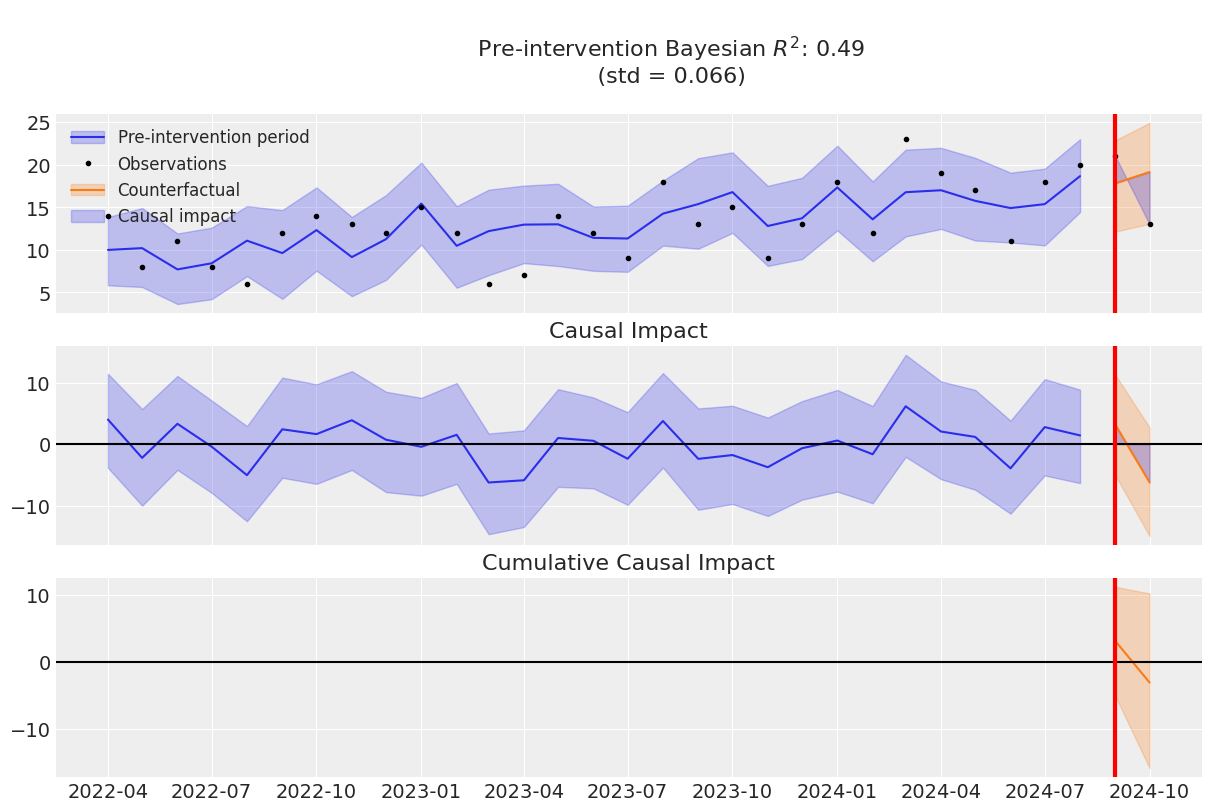

In [45]:
fig4, ax = result4.plot()

# Adjust the figure size
fig4.set_size_inches(12, 8)  # Example: Width = 12 inches, Height = 8 inches

Causal Graph for Austin saved as Austin_plot.png


(0.0, 1.0, 0.0, 1.0)

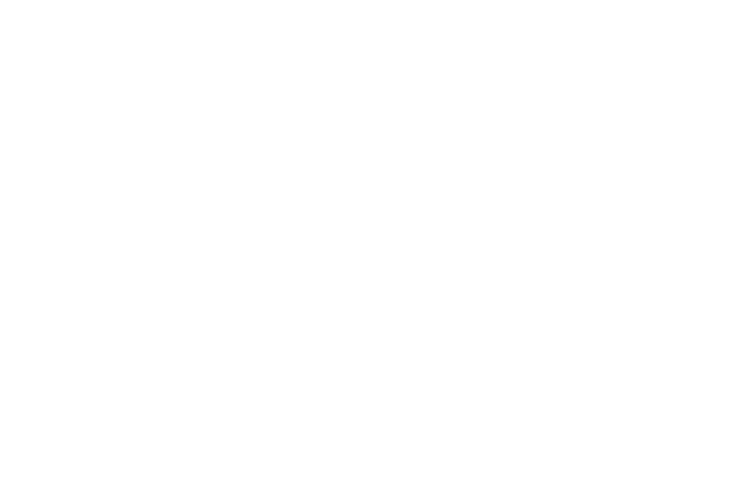

In [46]:
import matplotlib.image as mpimg



fig4.savefig(f"{MSA_MARKET}_causal_impact_plot.png")
plt.close()  # Close the figure to avoid overwriting
print(f"Causal Graph for {MSA_MARKET} saved as {MSA_MARKET}_plot.png")
plt.axis('off')  # Turn off axes for better visualization
# img = mpimg.imread(f"{MSA_MARKET}_plot.png")#
# plt.imshow(img)

In [47]:
# List all attributes and methods of the model object
print(dir(result4))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_x_design_info', '_y_design_info', 'bayesian_plot', 'datapost', 'datapre', 'expt_type', 'formula', 'idata', 'input_validation', 'labels', 'model', 'ols_plot', 'outcome_variable_name', 'plot', 'post_X', 'post_impact', 'post_impact_cumulative', 'post_pred', 'post_y', 'pre_X', 'pre_impact', 'pre_pred', 'pre_y', 'print_coefficients', 'score', 'summary', 'supports_bayes', 'supports_ols', 'treatment_time']


In [48]:
pre_pred_samples = result4.pre_pred.posterior_predictive["y_hat"]
print(pre_pred_samples)  # Check the structure

<xarray.DataArray 'y_hat' (chain: 4, draw: 1000, obs_ind: 29)> Size: 928kB
array([[[10.35562209, 13.62613743,  4.32717487, ..., 20.99893919,
         19.6257655 , 21.04944897],
        [10.97318938,  9.94476982, 12.56004561, ..., 14.62720268,
         17.68295679, 27.44302729],
        [ 9.66811677,  7.36902946, 10.91602134, ..., 17.67325385,
         13.7942019 , 16.33219967],
        ...,
        [15.08956034,  6.81824219,  4.39602555, ..., 17.16396439,
          9.98875392, 10.60130298],
        [ 2.96674319, 14.81131021,  8.84789623, ..., 16.79408619,
         12.21497559, 25.02176553],
        [14.85179913,  8.70372337, 12.48983573, ..., 16.63992788,
         19.74437347, 16.82888858]],

       [[13.18730683,  8.01618934,  7.52362861, ..., 15.71162095,
         14.16638258, 22.46119508],
        [14.08145963,  8.02748164,  8.0497359 , ..., 11.66247645,
         14.95723715, 17.64772454],
        [ 9.98663812,  8.87654529, -2.3570804 , ..., 16.84897311,
         12.87611162, 21.754

In [49]:
# Compute the mean prediction across posterior samples
pre_pred_mean = pre_pred_samples.mean(dim="draw")
pre_pred_mean


<xarray.DataArray 'y_hat' (chain: 4, obs_ind: 29)> Size: 928B
array([[ 9.92200636, 10.27744351,  7.77367175,  8.39252608, 11.07932848,
         9.77096546, 12.26386439,  9.25363693, 11.26269628, 15.02529172,
        10.47476952, 12.30333234, 12.87146131, 12.89377713, 11.2992496 ,
        11.30675994, 14.29615708, 15.37712778, 16.54440031, 12.77681985,
        13.6484844 , 17.27773466, 13.65885315, 16.84266791, 16.85357022,
        15.73429633, 14.7998207 , 15.2936383 , 18.47470773],
       [10.10420735, 10.2356836 ,  7.67491326,  8.33395987, 11.02156426,
         9.5874555 , 12.30831909,  9.1250934 , 11.28409859, 15.66581044,
        10.64749242, 12.09181733, 12.84824353, 13.13838686, 11.48865368,
        11.29958902, 14.28770731, 15.53692114, 16.91790681, 12.88184923,
        13.81171383, 17.52172966, 13.7950007 , 16.90104112, 17.02479827,
        15.66586891, 14.8727297 , 15.15564096, 18.70286337],
       [10.07045232, 10.19111246,  7.65015193,  8.5056307 , 11.0501979 ,
         9.59129228, 12.43481799,  9.06941518, 11.34533936, 15.70212075,
        10.42733723, 12.18807336, 12.85292253, 12.83882736, 11.56163575,
        11.45349644, 14.12399561, 15.12841686, 16.93600699, 12.60794729,
        13.65774205, 17.57677059, 13.56589364, 16.81490002, 17.07664832,
        15.78332924, 14.97965043, 15.22782897, 18.52741991],
       [ 9.94378143, 10.19885217,  7.69727392,  8.40121247, 10.99319793,
         9.4136896 , 12.47752571,  9.01946095, 11.23843028, 15.31636734,
        10.39724468, 12.30913347, 12.8796084 , 13.1293105 , 11.47730124,
        11.42057342, 14.25970481, 15.5106845 , 16.68228112, 12.70827717,
        13.54542714, 17.28800343, 13.5365483 , 16.85683765, 16.85650099,
        16.13063026, 15.04422262, 15.26428881, 18.62307415]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * obs_ind  (obs_ind) int64 232B 0 1 2 3 4 5 6 7 8 ... 21 22 23 24 25 26 27 28

In [50]:
import arviz as az

az.summary(result4.post_impact.max("obs_ind"))
az.summary(result4.pre_pred.posterior_predictive["y_hat"].mean("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
y_hat,13.062,0.902,11.26,14.659,0.014,0.01,4038.0,3035.0,1.0


In [51]:
az.summary(result4.post_impact.max("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,3.281,4.254,-4.657,11.232,0.068,0.048,3988.0,3552.0,1.0


In [52]:
# get index of the final time point
index_4 = result4.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# get summary stats
az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,-3.058,6.806,-14.128,7.974,0.111,0.081,3778.0,3385.0,1.0


In [53]:
from scipy.stats import norm

# Inputs
estimate = 56.046
lower_ci = 19.697
upper_ci = 93.348
z_critical = 1.645  # For a 90% confidence interval

# Calculate standard error
se = (upper_ci - lower_ci) / (2 * z_critical)

# Calculate z-score
z_score = estimate / se

# Calculate p-value
p_value = 2 * norm.sf(abs(z_score))
print(f"p-value: {p_value:.4f}")

p-value: 0.0123


In [54]:
# # get index of the final time point
# index_4 = result4.post_impact_cumulative.obs_ind.max()
# # grab the posterior distribution of the cumulative impact at this final time point
# last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# # get summary stats
# az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

In [55]:
df_series.tail()

,year_month,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
27,2024-06-01,11,False,36,6,11663,2187.32,703,234
28,2024-07-01,18,False,37,7,12294,1855.29,646,236
29,2024-08-01,20,False,38,8,13847,2297.06,661,251
30,2024-09-01,21,True,39,9,16096,2863.06,821,347
31,2024-10-01,13,True,40,10,15602,3602.98,765,326


In [56]:
#number of intervention periods
int_periods = df_series['intervention'].sum()

#rows with intervention
intervention_df = df_series.tail(int_periods)

int_dates = intervention_df[['year_month', 'io_count']].reset_index(drop=True)
int_dates['treatment_region'] = MSA_MARKET
# Add a column with the index number
int_dates['Index_Number'] = int_dates.index

int_dates.head()

,year_month,io_count,treatment_region,Index_Number
0,2024-09-01,21,Austin,0
1,2024-10-01,13,Austin,1


In [57]:
int_dates.iloc[0][0]

/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_4874/3285902388.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  int_dates.iloc[0][0]


Timestamp('2024-09-01 00:00:00')

In [58]:
for i in range(int_periods):
    if i ==0:
        az_df = pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}), hdi_prob=0.9))
    else:

        # Concatenate the row to the DataFrame
        #df = pd.concat([df, new_row], ignore_index=True)
        new_row = pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}), hdi_prob = 0.9))
        az_df = pd.concat([az_df, new_row], ignore_index=True)
        #az_df.concat(pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}))))

az_df['Index_Number'] = az_df.index
az_df['bayes_Stat_Sig'] = (~((az_df['hdi_5%'] < 0 )| (az_df['hdi_95%'] < 0)))
az_df.head()

az_join = pd.merge(int_dates, az_df, on = 'Index_Number', how = 'inner')
az_join['counter_io_count'] = az_join['io_count'] - az_join['mean']
az_join['perc_lift'] = round((az_join['io_count'] - az_join['counter_io_count'])/az_join['counter_io_count'], 4)

az_final = az_join[['Index_Number', 'year_month', 'treatment_region', 'io_count', \
    'counter_io_count', 'mean', 'sd','perc_lift', 'bayes_Stat_Sig', 'hdi_5%', 'hdi_95%','mcse_mean', 'mcse_sd' ]]

az_final =az_final.rename(columns = {'mean': 'bayes_uplift'})
az_final.head()


,Index_Number,year_month,treatment_region,io_count,counter_io_count,bayes_uplift,sd,perc_lift,bayes_Stat_Sig,hdi_5%,hdi_95%,mcse_mean,mcse_sd
0,0,2024-09-01,Austin,21,17.861,3.139,4.384,0.1757,False,-4.320,9.930,0.070,0.050
1,1,2024-10-01,Austin,13,19.197,-6.197,4.635,-0.3228,False,-13.538,1.588,0.075,0.053


In [59]:
# Save with the index column
az_final.to_csv(f"{MSA_MARKET}_monthly_uplift.csv", index=True)

In [60]:
# get index of the final time point
index_4 = result4.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# get summary stats
az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

az_cumulative = az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

In [61]:
int_dates

,year_month,io_count,treatment_region,Index_Number
0,2024-09-01,21,Austin,0
1,2024-10-01,13,Austin,1


In [62]:
result = int_dates.agg(
    treatment_start = ("year_month", "min"),
    treatment_end = ("year_month", "max"),
    io_sum = ("io_count", "sum")
).reset_index()

In [63]:
result

,index,year_month,io_count
0,treatment_start,2024-09-01,NaN
1,treatment_end,2024-10-01,NaN
2,io_sum,NaT,34.0


In [64]:
int_dates['io_count'].sum()

34

In [65]:
az_cumulative.head()

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,-3.058,6.806,-14.128,7.974,0.111,0.081,3778.0,3385.0,1.0


In [66]:
#adjust the cumulative table

#az_cumulative['Index_Number'] = az_df.index
az_cumulative['bayes_Stat_Sig'] = (~((az_cumulative['hdi_5%'] < 0 )| (az_cumulative['hdi_95%'] < 0)))
#az_cumulative.head()
az_cumulative['io_sum'] = int_dates['io_count'].sum()
az_cumulative['counter_io_sum'] = az_final['counter_io_count'].sum()
az_cumulative['treatment_region'] = MSA_MARKET
az_cumulative['treatment_start'] = int_dates['year_month'].min()
az_cumulative['treatment_end'] = int_dates['year_month'].max()
#az_cumulative_join = pd.merge(az_cumulative_final, az_cumulative, on = 'Index_Number', how = 'inner')

#az_cumulative['counter_io_count'] = az_cumulative_join['io_count'] - az_join['mean']
az_cumulative['perc_lift'] = round((az_cumulative['io_sum'] - \
    az_cumulative['counter_io_sum'])/az_cumulative['counter_io_sum'], 4)

az_cumulative_final = az_cumulative[['treatment_region', 'treatment_start', 'treatment_end', \
    'io_sum', 'counter_io_sum', 'mean', 'sd','perc_lift', 'bayes_Stat_Sig', 'hdi_5%', 'hdi_95%','mcse_mean', 'mcse_sd' ]]

az_cumulative_final =az_cumulative_final.rename(columns = {'mean': 'bayes_uplift'})
az_cumulative_final.head()

,treatment_region,treatment_start,treatment_end,io_sum,counter_io_sum,bayes_uplift,sd,perc_lift,bayes_Stat_Sig,hdi_5%,hdi_95%,mcse_mean,mcse_sd
x,Austin,2024-09-01,2024-10-01,34,37.058,-3.058,6.806,-0.0825,False,-14.128,7.974,0.111,0.081


In [67]:
# Save with the index column
az_cumulative_final.to_csv(f"{MSA_MARKET}_cumulative_uplift.csv", index=True)